Loading flight segments from routes/cs_2023-04-01.csv...
Total segments: 186427
              id     from_time       to_time   from_lat   from_lon     to_lat  \
0   000042HMJ225  1.680349e+09  1.680365e+09  42.941666  14.271751  46.177048   
1   000042HMJ225  1.680365e+09  1.680383e+09  46.177048  14.543554  35.847458   
2  001260TC T124  1.680347e+09  1.680347e+09  40.781622  26.631546  40.737488   
3  001260TC T124  1.680347e+09  1.680348e+09  40.737488  26.461792  40.717529   
4  001260TC T124  1.680348e+09  1.680348e+09  40.717529  26.377625  40.729298   

      to_lon  from_alt   to_alt  from_speed  to_speed  
0  14.543554  11521.44  1569.72    0.232055  0.139918  
1  14.489973   1569.72   114.30    0.139918  0.000000  
2  26.461792   4297.68  4876.80    0.031492  0.031096  
3  26.377625   4876.80  5242.56    0.031096  0.029558  
4  26.257761   5242.56  5486.40    0.029558  0.046496  
Sampling 20000 segments for visualization...
Plotting flight segments...


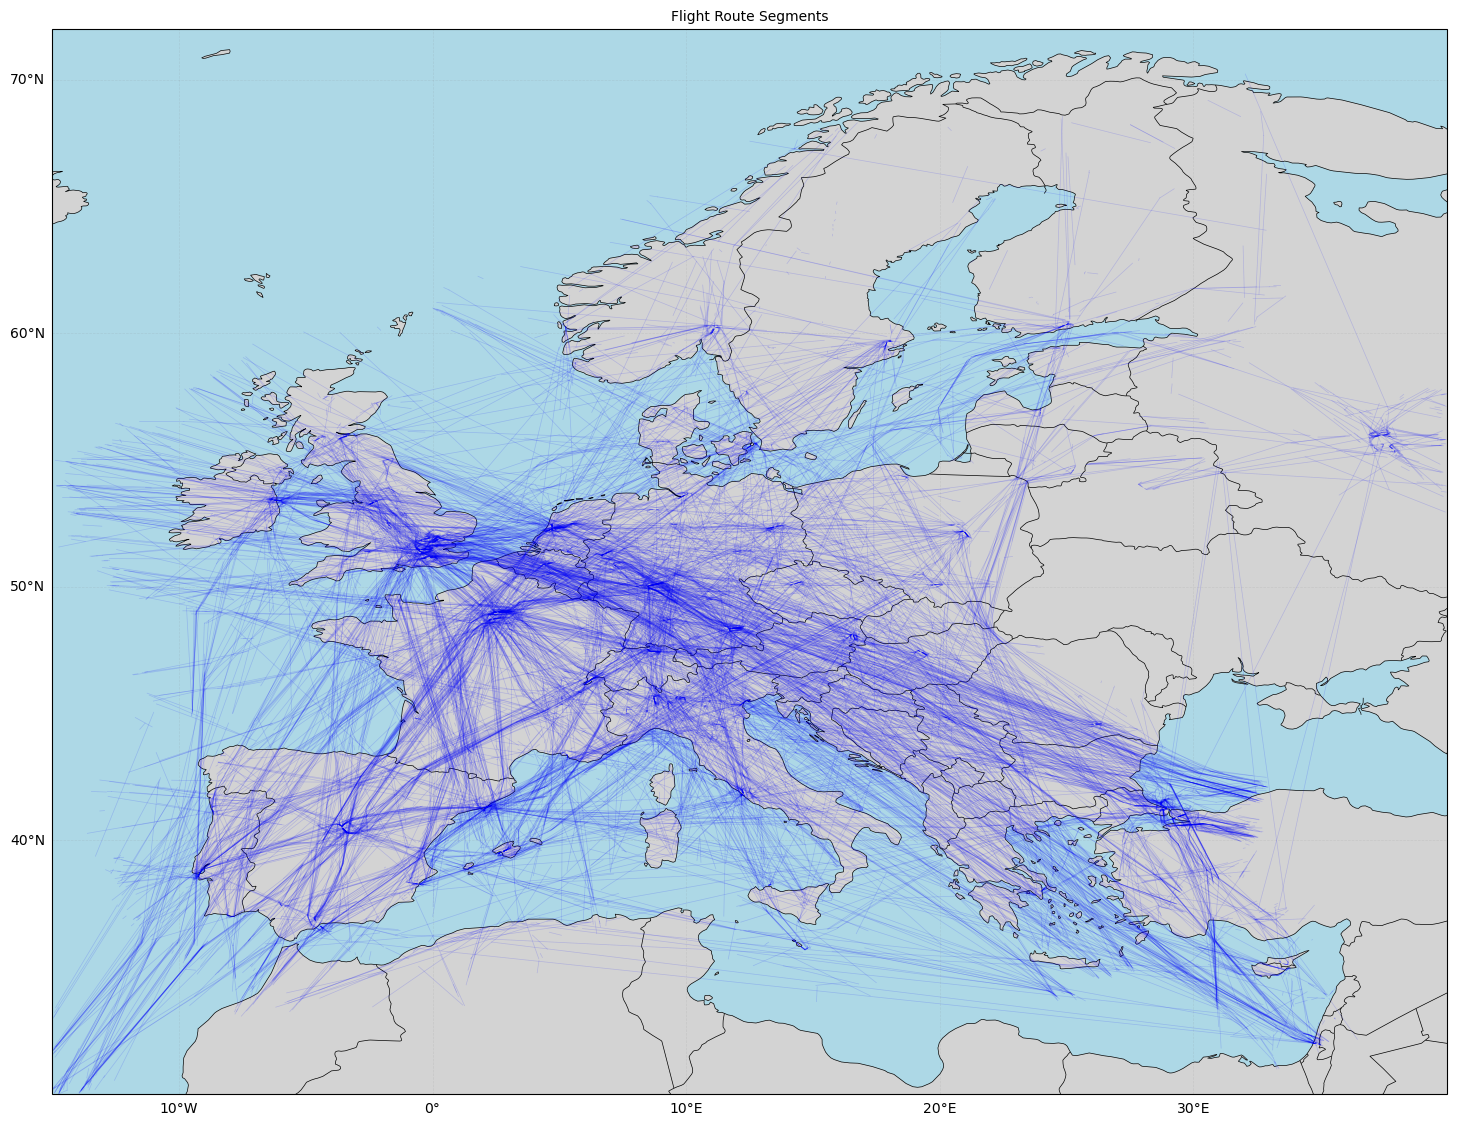

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import random

# Function to load and visualize flight segments
def visualize_flight_segments(csv_path, max_segments=20000):
    """
    Visualize flight route segments on a cartopy map.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file containing flight segments data
    max_segments : int
        Maximum number of segments to plot (default: 20000)
    """
    # Load the flight segments data
    print(f"Loading flight segments from {csv_path}...")
    segments_df = pd.read_csv(csv_path)
    
    # Print basic info about the data
    print(f"Total segments: {len(segments_df)}")
    print(segments_df.head())
    
    # Sample segments if there are more than max_segments
    if len(segments_df) > max_segments:
        print(f"Sampling {max_segments} segments for visualization...")
        segments_df = segments_df.sample(max_segments, random_state=42)
    
    # Create a figure with a map projection
    plt.figure(figsize=(18, 15))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    
    # Set map extent to cover Europe (adjust as needed)
    ax.set_extent([-15, 40, 30, 72], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.15, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot flight segments
    print("Plotting flight segments...")
    for _, row in segments_df.iterrows():
        ax.plot([row['from_lon'], row['to_lon']], 
                [row['from_lat'], row['to_lat']], 
                color='blue', linewidth=0.5, alpha=0.15, 
                transform=ccrs.PlateCarree())
    
    # Add title and labels
    plt.title('Flight Route Segments', fontsize=10)

    # Save the plot to a file
    plt.savefig('flight_segments.png', dpi=300, bbox_inches='tight')
    
    return plt

# Example usage
# Load and visualize the flight segments
csv_path = "routes/cs_2023-04-01.csv"
plt = visualize_flight_segments(csv_path)
plt.show()
